In [4]:
import pandas as pd

df = pd.read_csv("results/shapes3d_erm_111_train.csv")

In [6]:
df['epoch'] = df['epoch_repr_pred']

## Baseline 1: ERM training for predicting each Factor of Variation independently

* Train and val are i.i.d.
* Test set is compositional.
* Performance degrades for all factors of variation consistently on the test set. Validation accuracy is perfect.

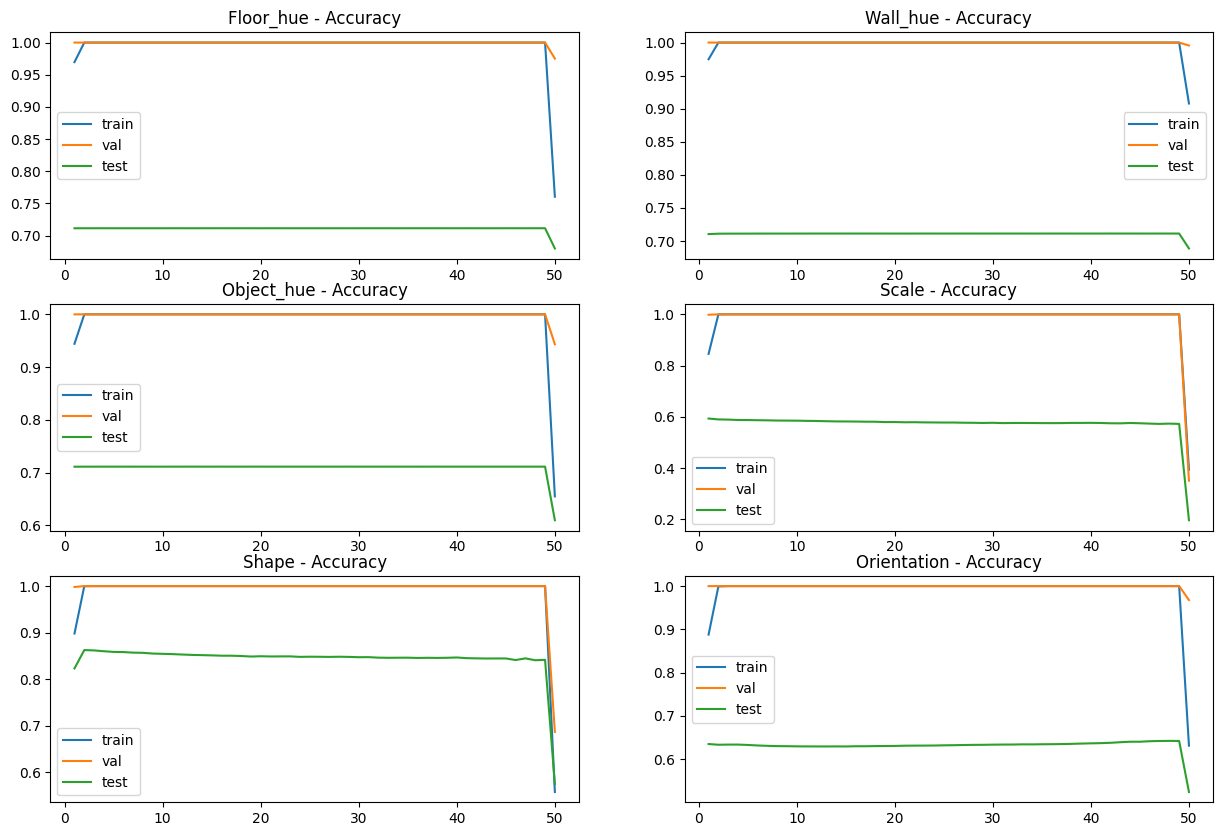

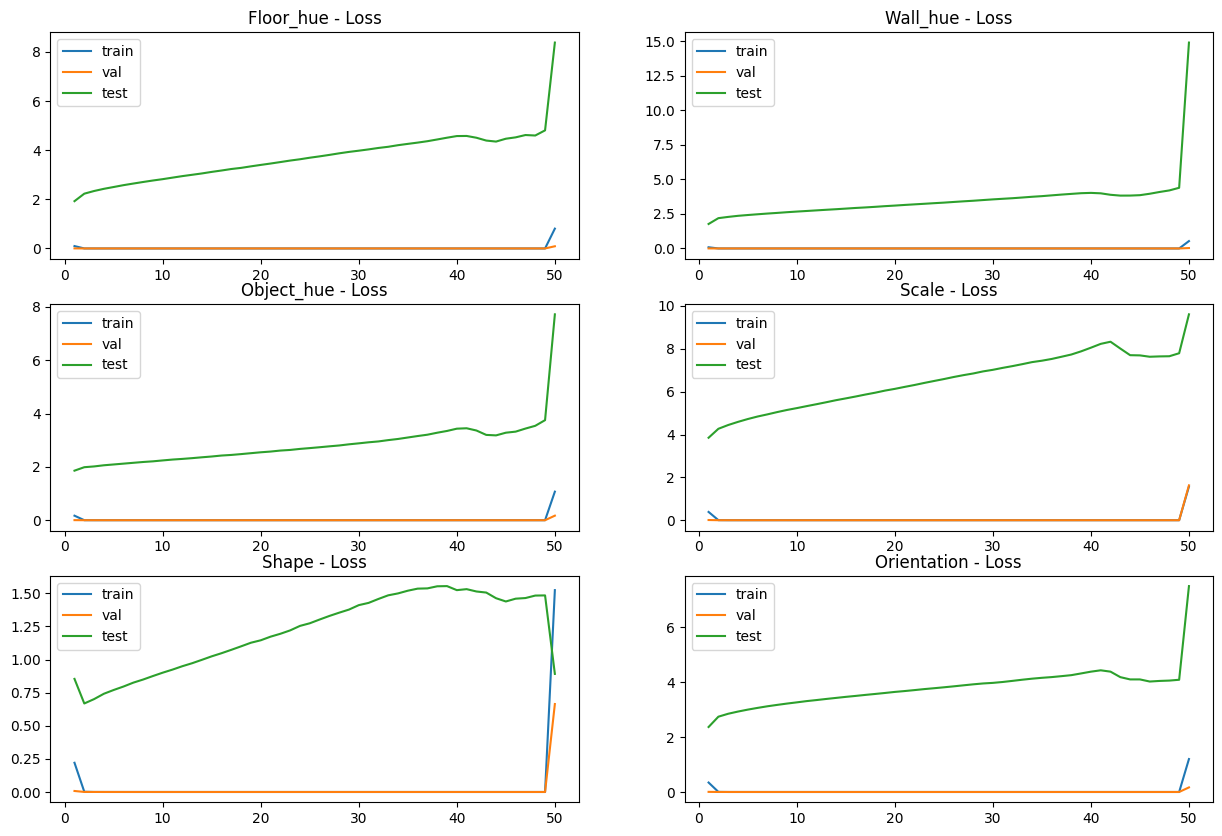

In [19]:
import matplotlib.pyplot as plt

tasks = ["floor_hue", "wall_hue", "object_hue", "scale", "shape", "orientation"]
splits = ['train', 'val', 'test']
metrics = {split: pd.read_csv(f"results/shapes3d_erm_111_{split}.csv") for split in splits}
fig, axs = plt.subplots(figsize=(15,10), nrows = 3, ncols = 2)

axs = axs.ravel()
for task_id, task in enumerate(tasks):
    for split_id, split in enumerate(splits):
        x = metrics[split]['epoch_repr_pred']
        y = metrics[split][f'{task}_acc']
        axs[task_id].plot(x,y, label=split)
        axs[task_id].legend()
        axs[task_id].set_title(f"{task.capitalize()} - Accuracy")

fig, axs = plt.subplots(figsize=(15,10), nrows = 3, ncols = 2)

axs = axs.ravel()
for task_id, task in enumerate(tasks):
    for split_id, split in enumerate(splits):
        x = metrics[split]['epoch_repr_pred']
        y = metrics[split][f'{task}_loss']
        axs[task_id].plot(x,y, label=split)
        axs[task_id].legend()
        axs[task_id].set_title(f"{task.capitalize()} - Loss")

## Baseline 2 - ERM training on pairs of images to predict differences in Latent Factors of Variation

* Prediction is done through a classifier for each factor of variation.
* Class labels for each factor of variation are ["same", "different"] for all colors and shape, while for ['scale','orientation'] we use ["higher than", "same", "lower than"]

In [11]:
tasks = ["floor_hue", "wall_hue", "object_hue", "scale", "shape", "orientation"]
splits = ['train', 'val', 'test']
metrics = {split: pd.read_csv(f"results/shapes3d_pair_erm_111_{split}.csv") for split in splits}
fig, axs = plt.subplots(figsize=(15,10), nrows = 3, ncols = 2)

axs = axs.ravel()
for task_id, task in enumerate(tasks):
    for split_id, split in enumerate(splits):
        x = metrics[split]['epoch_repr_pred']
        y = metrics[split][f'{task}_acc']
        axs[task_id].plot(x,y, label=split)
        axs[task_id].legend()
        axs[task_id].set_title(f"{task.capitalize()} - Accuracy")

{'test':     Unnamed: 0  floor_hue_acc  floor_hue_loss  wall_hue_acc  wall_hue_loss  \
 0            0       0.711260        1.923980      0.710452       1.770608   
 1            1       0.711308        2.228293      0.711072       2.191551   
 2            2       0.711311        2.337134      0.711147       2.282658   
 3            3       0.711326        2.426013      0.711171       2.360322   
 4            4       0.711302        2.499854      0.711172       2.418605   
 5            5       0.711316        2.574898      0.711233       2.472783   
 6            6       0.711310        2.640207      0.711238       2.524798   
 7            7       0.711311        2.703722      0.711240       2.571690   
 8            8       0.711315        2.764166      0.711232       2.622575   
 9            9       0.711311        2.819018      0.711255       2.668483   
 10          10       0.711324        2.881217      0.711260       2.710711   
 11          11       0.711319        2.9423

## Baseline 3: Predict using Individual Encoders to feed a Predictor to predict differences in Latent Factors of Variation

* End to End training of the Individual Encoders (VisionTransformers) and Predictor (Sequence of MLPs).
* This setup allows testing for different methods of Representation Learning like PretrainedModels, I-JEPA or Task-JEPA.

### End-to-End ERM

### Pretrained Models

### I-JEPA

### Task-JEPA